# Suspected EV Customers Challenge 

### About the challenge

* Based on market research, Ireland (ROI) has 70,000 Electric Vehicle(EV) Customers
who own an EV. Energia has 10% of those customers. But they could only identify
around 2.4K EV Customers from their database as they are on EV Tariff.
* Rest of the customers may own an EV but are not on EV Tariff and that’s what brings this challenge.
* The challenge is to find rest of the suspected EV Customers (Customers who own EV
but are not on ‘EV Tariff’)

### Data

This is an Analytics report on the data provided by Energia which generates and supply electricity to the houses in Northern Ireland and Ireland. The data provided by them is customer's electricity usage data from Jan 2021 to Jan 2023. The data has the following columns.

1. StartDate - The start date of the customer.
2. contractStartDate - The state of the customer.
3. ContractStartDateEV - The start date of EV tariff contract.
4. contractEndDate - The end date of the customer.
5. saStatus	- Whether the customer is an active customer.
6. agedBand	- The age band of the customer.
7. signedUpGroup - Channel information, such as Field Sales, Tele Sales, Web, etc., by which the customer was gained.
8. title - Sex of the customer.
9. mosaicType - Customer segmentation data.
10. EV - Whether EV customer or not.
11. EV_New_or_Old - Whether the consumer is an existing energia subscriber who moved to the EV rate or a new customer who chose the EV tariff.	
12. bill_1_2021	- bill_1_2023 - Usage data in KwH for every two months, from 2021 to 2023

We start with merging the two data files and reading it as dataframes, concatinating those dataframes into a single dataframe to start our analysis. 

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [65]:
pd.pandas.set_option("display.max_columns", None) #Used to display all the columns.

Loading data into DataFrames

In [66]:
df1 = pd.read_excel("WB1_Energia_Challenge_March_2023_Data.xlsx", sheet_name= "Data1", index_col=0)
df2 = pd.read_excel("WB2_Energia_Challenge_March_2023_Data.xlsx", sheet_name= "Data2", index_col=0)

Concatinating df1 and df2

In [67]:
df = pd.concat([df1, df2])
df.head()

,StartDate,ContractStartDateEV,contractStartDate,contractEndDate,saStatus,agedBand,signedUpGroup,title,mosaicType,EV,EV_New_or_Old,bill_1_2021,bill_2_2021,bill_3_2021,bill_4_2021,bill_5_2021,bill_6_2021,bill_1_2022,bill_2_2022,bill_3_2022,bill_4_2022,bill_5_2022,bill_6_2022,bill_1_2023
accountID,,,,,,,,,,,,,,,,,,,,,,,,
0,2022-05-03,NaT,2022-05-03,2023-05-03,Active,41 to 50,PCW,Mr,NaN,N,Non-EV Customers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,581.0,542.0,696.0,0.0,2813.0
1,2018-03-09,NaT,2023-03-14,2024-03-14,Active,Unclassified,Telesales,Ms,F17,N,Non-EV Customers,1278.0,1008.0,1278.0,926.0,1131.0,1081.0,1200.0,1179.0,1182.0,985.0,917.0,983.0,1130.0
2,2022-01-14,NaT,2023-01-15,2024-01-15,Active,Unclassified,Other,Mr,G18,N,Non-EV Customers,0.0,0.0,0.0,0.0,0.0,0.0,381.0,706.0,629.0,681.0,848.0,1455.0,0.0
3,2021-03-23,NaT,2021-03-23,2022-03-23,Active,41 to 50,Other,Mrs,K31,N,Non-EV Customers,0.0,0.0,428.0,348.0,343.0,456.0,470.0,381.0,364.0,333.0,397.0,407.0,526.0
4,2020-10-29,NaT,2021-10-30,2022-10-30,Active,Unclassified,Telesales,Mr,NaN,N,Non-EV Customers,670.0,736.0,452.0,663.0,265.0,313.0,497.0,183.0,250.0,234.0,381.0,358.0,233.0


Dropping duplicate values, we catagorize a record as duplicate if all the columns values of that record matches exactly all the column values of a record that is already present in the data. So except the accountId every value would be same. Dropping these values are important as it will reduce our data size without loosing the exact information. The data contains _x_ duplicate values, and after removing these values, _y_ entries remain records.

In [68]:
df.drop_duplicates(subset=df.columns, keep="first", inplace=True)
df["month"] = df["StartDate"].dt.month
df["year"] = df["StartDate"].dt.year
df.sort_values(by="StartDate", inplace=True)
df.reset_index(drop=True)
df.to_csv("raw_combined.csv")

Finding columns with missing values and % of missing values in each column

In [69]:
col_missing= []
for col in df.columns:
    missing = round(df[col].isna().mean(), 4)*100
    if missing>0:
        print(f"{missing}% missing values in {col} column.")
        col_missing.append(col)

98.65% missing values in ContractStartDateEV column.
0.31% missing values in contractStartDate column.
0.52% missing values in contractEndDate column.
22.689999999999998% missing values in mosaicType column.


Finding the columns with missing values, Missing values refer to the absence of a value for a particular variable or feature in a dataset. It means that the value that should be present for a particular observation is not available or is unknown. Missing values can affect data analysis and modeling because they can cause biased or incorrect results if not handled properly. Therefore, it's essential to identify, handle, and impute missing values appropriately before conducting any data analysis or modeling.

In our data ContractStartDateEV, contractStartDate, contractEndDate, mosaicType having 98.65%, 0.31%, 0.52, 22.68% values missing respectively.

In [70]:
col_missing

['ContractStartDateEV', 'contractStartDate', 'contractEndDate', 'mosaicType']

Checking the datatype of all the columns, to guarantee data correctness and consistency, it is crucial to check the datatype of each column in a dataset. Validating and cleaning data can be done successfully by making sure it is in the right format. This can ensure that the data is accurate for making decisions and assist prevent errors in computations or analysis. Therefore, it is advised that as part of the data preparation process, all columns in a dataset have their datatypes checked.

Splitting numerical and catagorical features, to do individual analysis of each variable in the dataset we have to seperate the columns of the dataset into numerical and catagorical features. 

In the given data 'saStatus', 'agedBand', 'signedUpGroup', 'title', 'mosaicType', 'EV', 'EV_New_or_Old' are the catagorical variable and all the bills columns are the numerical column. 

In [71]:
numreical_features = df.select_dtypes(include="number").columns.to_list()
catagorical_features = df.select_dtypes(include="object").columns.to_list()

In [72]:
numreical_features = numreical_features[:-2]

In [73]:
catagorical_features

['saStatus',
 'agedBand',
 'signedUpGroup',
 'title',
 'mosaicType',
 'EV',
 'EV_New_or_Old']

Count of EV and Non-EV customers.

There are 186558 EV customers in our dataset in which there are only 2510 EV customers and the rest are Non-EV customers. The plot represents the same. This shows that the data is imbalanced. A dataset is said to be unbalanced if the target classes, or the classes we wish to forecast, are not distributed equally or are skewed towards one class over another. To put it another way, one class has a lot fewer samples than the others.

<Axes: xlabel='EV', ylabel='count'>

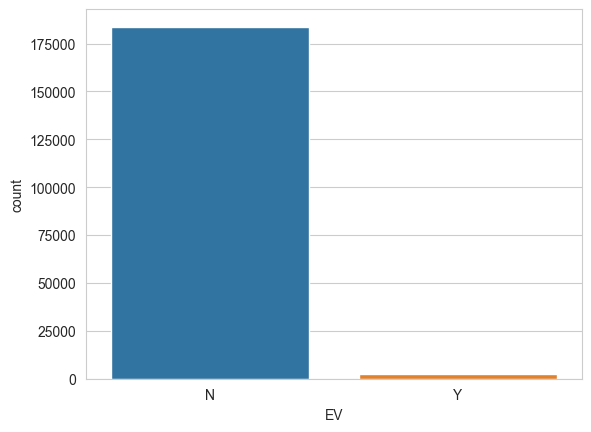

In [74]:
sns.set_style("whitegrid")
sns.countplot(x= "EV", data= df)

### Distribution of Numerical data.

The distribution of numerical data reveals how a variable's values are distributed or grouped together around particular values. It describes a dataset's shape, centre, and spread. The most common approach is the use of summary statistics like mean, median, mode, range, variance, and standard deviation for describing the distribution of numerical data. 

A graph that displays the distribution of a numerical value is called a histogram. It displays the frequency of data values falling into certain intervals or bins.

A right-skewed (or positively skewed) histogram has a longer tail on the right-hand side, indicating that the data has a few high values that are much larger than most of the other values. In this case, the mean is greater than the median. An example of a right-skewed histogram might be the distribution of salaries in a company, where a few employees earn much higher salaries than most of the others.

On the other hand, a left-skewed (or negatively skewed) histogram has a longer tail on the left-hand side, indicating that the data has a few low values that are much smaller than most of the other values. In this case, the mean is smaller than the median. An example of a left-skewed histogram might be the distribution of reaction times in a group of people, where a few individuals have very fast reaction times, but most people have slower reaction times.

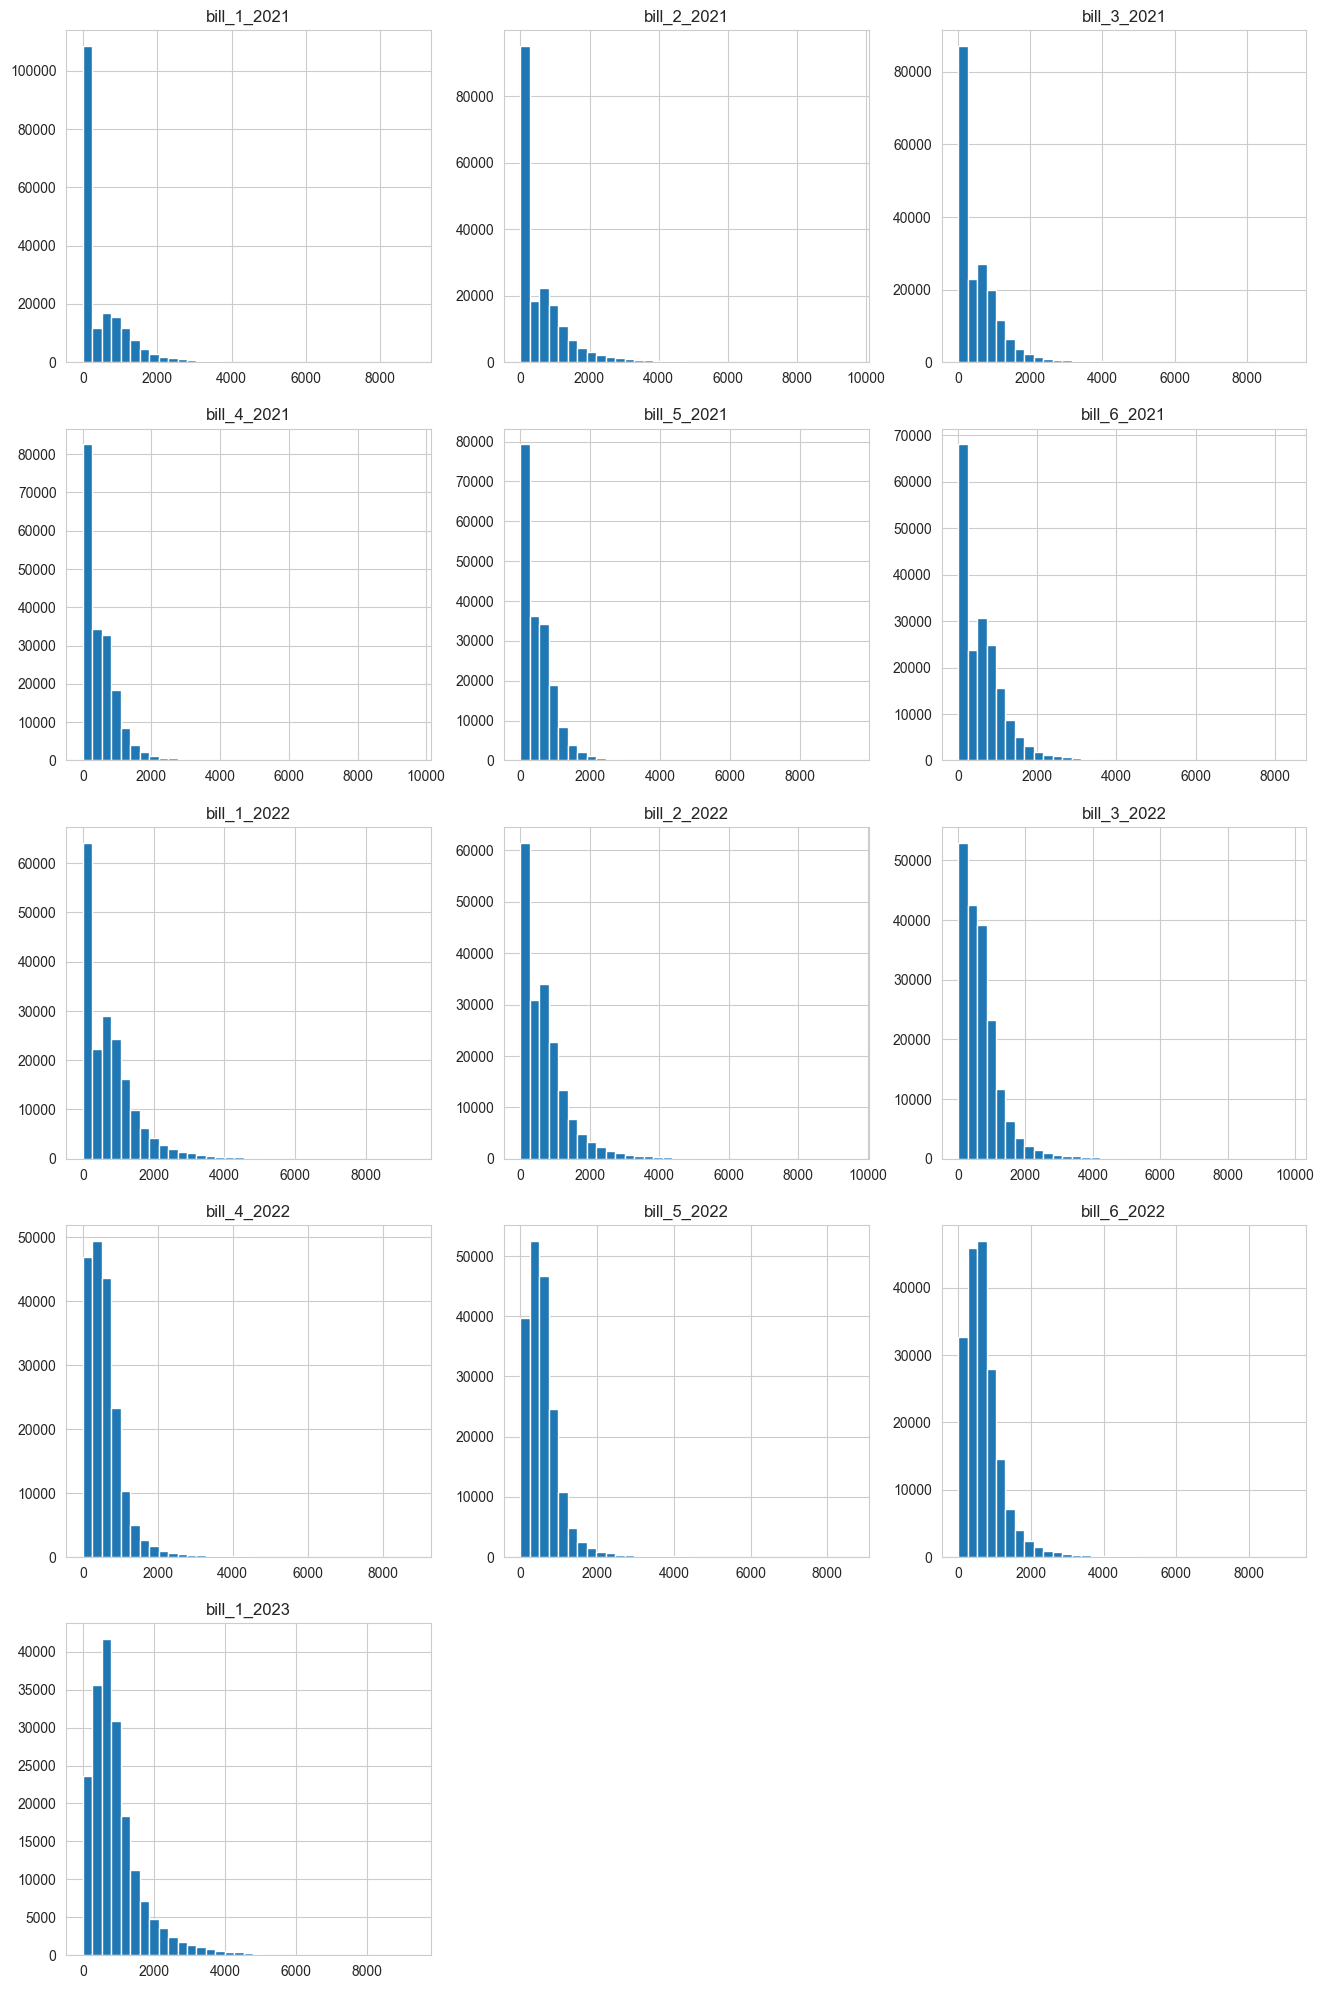

In [75]:
num_cols = len(numreical_features)
num_rows = (num_cols - 1) // 3 + 1

fig, axs = plt.subplots(num_rows, 3, figsize=(16, 5*num_rows))

for i, col in enumerate(numreical_features):
    row_idx, col_idx = i // 3, i % 3
    axs[row_idx, col_idx].hist(df[col], bins=35)
    axs[row_idx, col_idx].set_title(col)

if num_cols % 3 != 0:
    for col in range(num_cols % 3, 3):
        fig.delaxes(axs[-1, col])

plt.show()

In [76]:
def ev_data(data):
    data = df.copy()
    data = data[data["EV"]=="Y"]
    data.reset_index(drop=True, inplace= True)
    return data

### Growth of customers from 2013 to 2023.

The bar-plot below tells us about the growth of customers from 2013 to 2022 though there is a label of 2023 on the x-axis but we won't consider it as the data given to us is only till Jan 2023. There is a significant growth in the count of customers. The year in which the growth was the most was in 2021 with an increase of more than 45000 customers. 

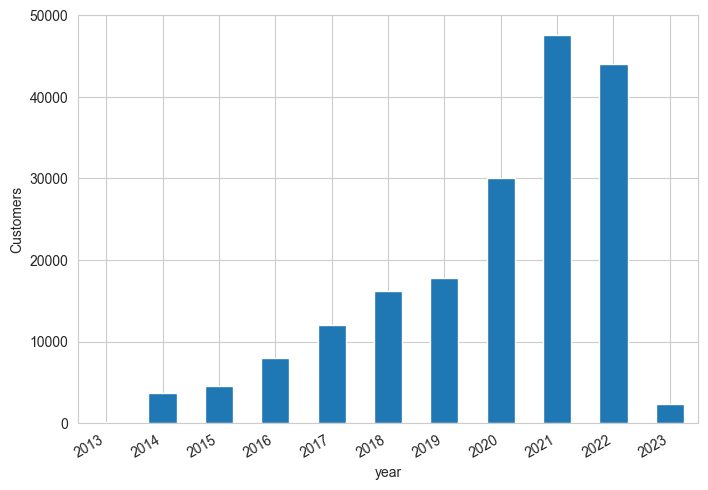

In [77]:
data = df.copy()
fig = plt.figure(figsize=(8, 6))
data.groupby("year")["StartDate"].count().plot.bar()
plt.ylabel("Customers")
fig.autofmt_xdate()
plt.show()

### Growth of customers from 2013 to 2023.

The bar-plot below tells us about the growth of customers from 2013 to 2022 though there is a label of 2023 on the x-axis but we won't consider it as the data given to us is only till Jan 2023. There is a significant growth in the count of customers. The year in which the growth was the most was in 2021 with an increase of more than 600 customers. 

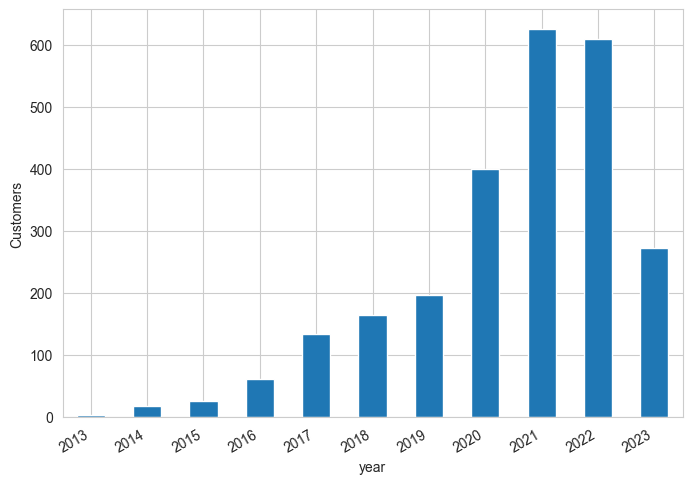

In [78]:
data = ev_data(data)
fig = plt.figure(figsize=(8, 6))
data.groupby("year")["StartDate"].count().plot.bar()
plt.ylabel("Customers")
fig.autofmt_xdate()
plt.show()

In [79]:
data = df.copy()

In [80]:
data['total_bills'] = data.iloc[:, 12:24].sum(axis=1)
data = data[data["total_bills"]>20]
data.reset_index(drop=True, inplace=True)

### Handling missing values in the data.

Statistical analysis and machine learning models' validity and accuracy may be impacted by missing data, making handling it a crucial issue. Inaccurate outcomes, diminished power, and decreased precision might occur from the absence of missing data. 

For reliable statistical analysis and machine learning models, addressing missing data is crucial. Imputation and deletion strategies are two options for handling missing data, however the approach to choose relies on the type of missing data and the research topic.

In the data there are values which are not present in the bills column, that represent that the data is missing and this will affect our model later. To fix this we will try to fill these value with some meaningful data. We will fill the zero values between the two Nonzero values of the bills column with the previous values. This will help us to fill the missing information with some estimated value

In [81]:
tf = data.copy()

fill_cols = tf.columns[11:-3]

# replace 0 values with NaN
tf[fill_cols] = tf[fill_cols].replace(0, np.nan)

# fill missing values with previous non-zero value
tf[fill_cols] = tf[fill_cols].ffill(axis=1)

# replace remaining NaN values with 0
tf[fill_cols] = tf[fill_cols].fillna(0)

The below plot analyze the trend of the median bill amount for each bill column from Jan 2021 to Jan 2023 for the customers who owns a electric vehicle. The value ranges from 900 - 1600. The plot shows that the minimum value for the EV customers is 900 units.

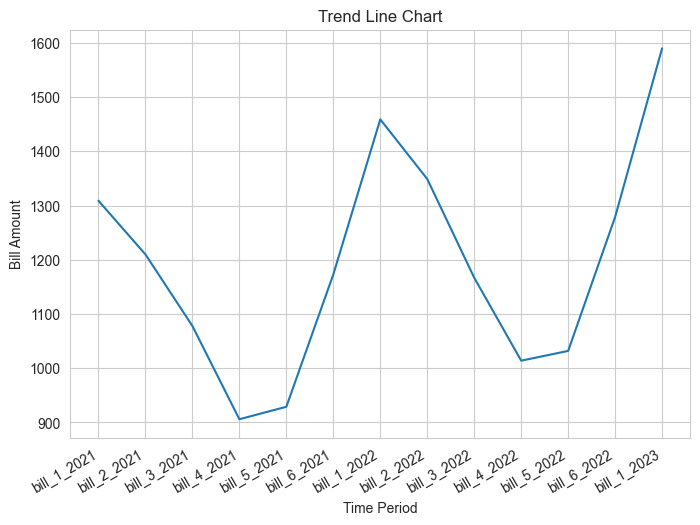

In [82]:
dt = tf.copy()
dt = dt[dt["EV"]=="Y"]

medians = []
counts = []

for col in numreical_features:
    dt = dt.copy()
    dt = dt[dt[col]>0]
    counts.append(dt[col].count())
    medians.append(dt[col].median())

fig = plt.figure(figsize=(8, 6))
sns.lineplot(x=numreical_features, y=medians)
plt.title('Trend Line Chart')
plt.ylabel('Bill Amount')
plt.xlabel('Time Period')
fig.autofmt_xdate()
plt.show()

In [83]:
tf["MAX Value"] = tf.iloc[:, 11:24].max(axis=1)
tf.to_csv("null_filled_enrgia.csv")

In [84]:
model_data = tf.copy()

## Creating Machine Learning Models

A mathematical system or combination of algorithms known as a machine learning model is capable of learning patterns from data and making predictions or judgements based on those patterns. The model is trained on a dataset before being applied to forecast fresh, unforeseen data.
Machine learning models come in many different varieties, such as supervised learning models like linear regression, decision trees, and neural networks, methods of reinforcement learning that use trial-and-error learning, such as unsupervised learning techniques like clustering and dimensionality reduction.

#### Steps for creating a machine learning model

* Determine the type of problem you are attempting to tackle and your goals by defining the issue. Determine the pertinent information that will be utilised to train and test the model.
* Cleaning and preprocessing the data will assure its integrity and usefulness for the training of the model. This process could include data normalisation, feature engineering, feature selection, and data cleansing.
* The data should be divided into sets for testing, validation, and training. The training set is used to train the model, the testing set is used to evaluate the model's performance, and the validation set is used to adjust the model's hyperparameters.
* Model Training: Use the training set of data to train the chosen model.
* Model Evaluation: Assess the model's performance on the validation set to ascertain whether the data it fits are being over- or under-fitted.
* Disposition To make predictions or judgements based on new data, deploy the model in a production environment.

### Imbalanced Data
A dataset is said to be imbalanced if the target variable or classes of interest are not distributed equally or nearly equally. In other words, there are much fewer examples or observations in one class than there are in the other. The dataset is unbalanced, for instance, in a binary classification task if one class only has 10% of the observations and the other class has 90% of the observations.
Machine learning is hampered in various ways by imbalanced datasets.

#### Treating imbalanced data using SMOTE

SMOTE (Synthetic Minority Over-sampling Technique), a well-liked method for handling unbalanced datasets, is employed in many applications. SMOTE creates synthetic minority class samples by interpolating between minority class samples that already exist. To create the new synthetic samples, one or more of a minority sample's closest neighbours are chosen, and a new sample is made along the line connecting the original sample and its neighbours. In some cases, oversampling the minority class using SMOTE can lead to overfitting, especially when the amount of minority data is small.

In our data "Y" is the minority class ie. the customers who owns a electric vehicle, so we have to oversample the "Y" class. After oversampling we have 60656 classes in each catagorey.

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, accuracy_score

In [86]:
model_data = model_data.iloc[:, 9:24]
model_data.drop("EV_New_or_Old", axis=1, inplace=True)
X = model_data.iloc[:, 1:]
y = model_data.iloc[:, 0]

model_data.head()

,EV,bill_1_2021,bill_2_2021,bill_3_2021,bill_4_2021,bill_5_2021,bill_6_2021,bill_1_2022,bill_2_2022,bill_3_2022,bill_4_2022,bill_5_2022,bill_6_2022,bill_1_2023
0,N,793.0,793.0,162.0,254.0,205.0,404.0,272.0,272.0,166.0,142.0,172.0,280.0,350.0
1,N,637.0,1144.0,483.0,373.0,351.0,527.0,715.0,621.0,384.0,335.0,309.0,572.0,855.0
2,N,1071.0,713.0,624.0,267.0,782.0,740.0,740.0,666.0,392.0,387.0,382.0,705.0,705.0
3,N,687.0,661.0,880.0,636.0,721.0,709.0,679.0,561.0,467.0,767.0,679.0,890.0,284.0
4,N,0.0,1967.0,3676.0,1908.0,1908.0,5171.0,2951.0,2341.0,1591.0,1461.0,1712.0,2389.0,2762.0


In [87]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy="minority")
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

EV
N    181775
Y    181775
Name: count, dtype: int64

### Confusion Matrix

A table that lists a classification model's performance is known as a confusion matrix. It determines the proportion of each class that was successfully or wrongly classified by comparing the predicted values of the model with the actual values. The matrix gives a thorough breakdown of the model's False positives, true negatives, false negatives, and forecasted true positives (TP, TN, FP, FN).

Here is an example of a confusion matrix for a binary classification problem:

|     | Predicted: Positive | Predicted: Negative |
| --- | --- | --- |
| Actual: Positive | True Positive (TP) | False Negative (FN) |
| Actual: Negative | False Positive (FP) | True Negative (TN) |

This is how we read a confusion matrix, we can use the following metrics:

Accuracy: The proportion of correct predictions out of the total number of predictions. It is calculated as (TP+TN) / (TP+TN+FP+FN).
Precision: The proportion of true positives out of the total number of positive predictions. It is calculated as TP / (TP+FP).
Recall: The proportion of true positives out of the total number of actual positives. It is calculated as TP / (TP+FN).
F1-score: A weighted average of precision and recall. It is calculated as 2 x (precision x recall) / (precision + recall).

By examining the values in the confusion matrix and calculating these metrics, We can learn more about the model's advantages and disadvantages and pinpoint opportunities for development.


### K-Nearest Neighbours

Application areas for the supervised machine learning algorithm K-nearest neighbours (KNN) include classification and regression.. In order to forecast the label of the new data point, it locates the k data points that are closest to the new input data point. It then uses the labels of those neighbours. For instance, in a binary classification problem, the KNN algorithm would predict that the new input data point will likewise have a label of 1 if the majority of the k nearest neighbours have a label of 1.
KNN is a simple and intuitive algorithm that can work well for small datasets and low-dimensional feature spaces. However, it can become computationally expensive for large datasets or high-dimensional feature spaces, as the algorithm must determine the separation between each new data point and each other data point in the dataset.

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Accuracy: 0.9314949800577638


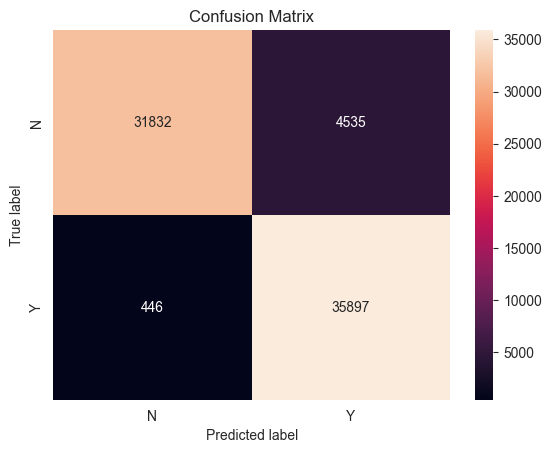

In [89]:
#Region "This is the code to be collapsed"
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

# Creating KNN model
knn = KNeighborsClassifier(n_neighbors=10)

# Train the model using train set
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

# Build the confusion matrix
cm = confusion_matrix(y_test, y_pred)

class_labels = list(set(y_sm))

# Visualize the confusion matrix using Seaborn
sns.heatmap(cm, annot=True, fmt='g', xticklabels= class_labels, yticklabels=class_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()
#End Region

The KNN model has an accuracy of 0.931 which indicates that it is correctly predicting 93.1% of the observations. In general, accuracy is a good measure when the classes are balanced. In this case, the two classes have roughly the same number of observations, so accuracy is a reasonable measure.

The model has a precision of 0.89, which means that when it predicts a positive class (Y), it is correct 89% of the time. The recall is 0.99, which means that the model is able to identify 99% of the positive cases correctly.

An evaluation of the model's performance can be made using a single metric, the harmonic mean of precision and recall, or F1-score, which is 0.93.

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.99      0.88      0.93     36367
           Y       0.89      0.99      0.94     36343

    accuracy                           0.93     72710
   macro avg       0.94      0.93      0.93     72710
weighted avg       0.94      0.93      0.93     72710



### Random Forest

For both classification and regression tasks, Random Forest is a supervised machine learning method.. Multiple decision trees are combined using an ensemble learning technique to produce a more precise and reliable prediction model.
This is how the algorithm operates:
1) Choose a portion of the first dataset at random.
2) Using a random subset of features at each split, construct a decision tree using the chosen subset.
3) To generate more than one decision tree, repeat steps 1 and 2.
4) Use the majority vote of the forecasts from all decision trees to predict the class for each new observation.

Comparing Random Forest to a single decision tree model, there are various benefits. By integrating several decision trees, it first lowers the danger of overfitting to the training data. Second, it can cope with missing data without the requirement for imputation and can handle both categorical and numerical data. Finally, it offers a feature importance measurement that can be helpful for feature selection.

In conclusion, Random Forest is a technique for ensemble learning that mixes various decision trees to produce a prediction model that is more precise and reliable.. It is a versatile algorithm that can handle both categorical and numerical data, deal with missing data, and provide a measure of feature importance.


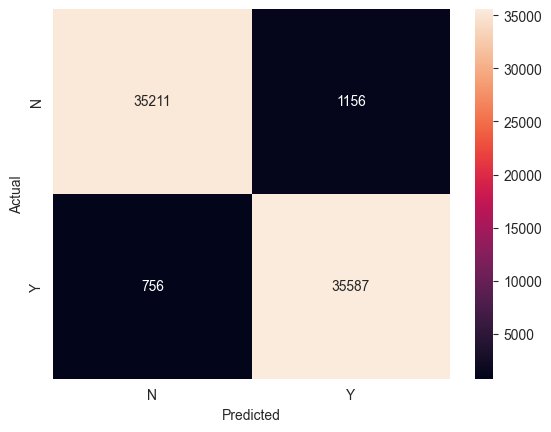

In [91]:
# Create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Y')
recall = recall_score(y_test, y_pred, pos_label='Y')
f1 = f1_score(y_test, y_pred, pos_label='Y')


# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='g', xticklabels= class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The random forest model appears to perform exceptionally well on the given binary classification problem based on the performance data you gave.
The model's overall accuracy was 0.98, which indicates that 98% of its predictions were accurate. The precision score for class Y is 0.99, which means that 99% of all the model's positive predictions were accurate. Recall score is 0.97, which indicates that 97% of all real positive events could be properly identified by the model.

In [92]:
print("Accuracy: {:.2f}".format(accuracy))
print("Precision for Y: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
target_names = ['N', 'Y']
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 0.97
Precision for Y: 0.97
Recall: 0.98
F1-score: 0.97
              precision    recall  f1-score   support

           N       0.98      0.97      0.97     36367
           Y       0.97      0.98      0.97     36343

    accuracy                           0.97     72710
   macro avg       0.97      0.97      0.97     72710
weighted avg       0.97      0.97      0.97     72710



### Comparing Models

##### KNN Model:
    * Accuracy: 0.931
    * Precision: 0.89
    * Recall: 0.99
    * F1-score: 0.93
    
##### Random Forest Model:
    * Accuracy: 0.97
    * Precision for Y: 0.97
    * Recall: 0.98
    * F1-score: 0.97


With the greatest accuracy score of 0.97 and precision score for class Y of 0.97, the random forest model fared the best, as can be seen from the aforementioned metrics. With an accuracy score of 0.931 and a high recall score of 0.99, the KNN model again performed admirably. With an accuracy score of 0.70 and worse precision, recall, and F1-score for both classes N and Y.

#### Conclusion

Further if we want to deploy a model, we can deploy Random Forest Model as it has the high accuracy as compared to KNN, however our goal is to predict the Non-EV customers so the false positive value is high in KNN model so we will consider KNN model for further deployment.